# Homework 4: Due Sunday 11/27 11:30pm

In this assignment, we are working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Background and Data Information
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset. 

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

### Libraries that can be used: numpy, scipy, pandas, scikit-learn, matplotlib, seaborn
Any libraries used in the discussion materials are also allowed.

# Exercises
## Exercise 1 - Agglomerative Clustering (40 points in total)

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >

### Exercise 1.1 - Choosing Parameters (20 points)

 - Explain why you would pick these parameters. 
     - Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
     - Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
     - What should the threshold distance be? 
 
Hints:
 - How the distance threshold works: Whenever two clusters are picked to consider merging them, the distance between those clusters is compared to the distance threshold. If the distance is smaller than the threshold, the clusters merge and the algorithm continues; Otherwise, they will not be merged.
 - How to choose a linkage rule: Think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
df = pd.read_csv('./bitstrings.csv')
display(df.shape)
df.head()

(1200, 16)

,b15,b14,b13,b12,b11,b10,b9,b8,b7,b6,b5,b4,b3,b2,b1,b0
0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0
1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
4,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0


In [7]:
clustering_labels=AgglomerativeClustering(n_clusters=None,affinity="hamming",compute_full_tree="auto",linkage="single",distance_threshold=2).fit_predict(df)
print(clustering_labels)

[7 7 7 ... 2 2 2]


Agg "number of clusters or distance threshold, linkage type, distance. Geometry is pairwise distance. A form of hiearchical clustering. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:" So... each root or branch node is supposed to access another dimension of the data. Each leaf is one sample from the final container, object, or last dimension.
Recursively merges pair of clusters of sample data; uses linkage distance.

Affinity="Hamming" Affinity is the method used to compute linkage value. We have bit vectors. And we want to see if two vectors are related, based on one bit change.

Apparently according to docs this is also l1. l1 is often good for sparse features with lots of zeros. Since we are using bit data, l1 should work best. Cant tell based on [this](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-metrics-py). Cant comprehend.

Linkage="single" Its how we analyse, or process given linkage values. So... It measures relation based on linkage values.

"Single" was preferred because it minimizes the distance between closest observations. Therefore, the less difference, the more your related, which is what we want for the binary linkage we are doing. I like it based on images of guide.

threshold distance=2 The linkage distance between clusters, which is too much to merge them. Or count them as the same group, or connected. Depends on your jargon.

2. Because if there is more than one difference in the bit sequence, then it fails the equivalence classification.

### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (20 points)

 - Perform the agglomerative clustering with the parameters you picked in the above three questions.
 - Show the frequency(number of members) of each cluster. You are encouraged to create a bar chart to show the distribution as it will help you in Exercise 2, but printing only the numbers is also fine.

Hints: 
 - The value of ```distance_threshold``` in the arguments should be **slightly** higher than what you picked. This is because we only merge two clusters when their distance is **strictly smaller** than the threshold.

7     0.246667
5     0.161667
0     0.160833
2     0.155833
6     0.083333
1     0.083333
3     0.082500
4     0.002500
8     0.002500
12    0.001667
10    0.001667
29    0.000833
21    0.000833
28    0.000833
27    0.000833
26    0.000833
30    0.000833
25    0.000833
24    0.000833
23    0.000833
22    0.000833
16    0.000833
20    0.000833
19    0.000833
18    0.000833
17    0.000833
15    0.000833
14    0.000833
13    0.000833
11    0.000833
9     0.000833
31    0.000833
dtype: float64


array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

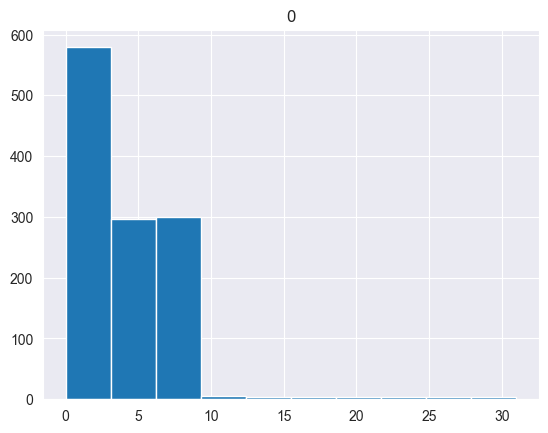

In [8]:
"Already Done" #Perform the agglo clustering with the parameters.
label_ratio=pd.DataFrame(clustering_labels).value_counts()/df.shape[0]
agglo_cluster=label_ratio.sort_index()*df.shape[0]
agglo_cluster.sort_index(inplace=True)
print(label_ratio) #Show the frequency number of each cluster.
pd.DataFrame(clustering_labels).hist() #Show the frequency number of each cluster.

In [9]:
label_ratio.size

32

## Exercise 2 - K-Means Clustering (30 points in total)
Let's see how k-means behave differently from agglomerative clustering.

### Exercise 2.1 - K-Means Clustering for Equivalence Classes (20 points)
 - Re-cluster the dataset with k-means, but with the number of clusters you obtained from Exercise 1.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.

In [10]:
from sklearn.cluster import KMeans
import numpy as np
thing=KMeans(random_state=69420,n_clusters=label_ratio.size)
labels_kM=thing.fit_predict(df) #Returns Index of the cluster each sample belongs to.

In [11]:
print(type(labels_kM))
unique, k_means_count = np.unique(labels_kM, return_counts=True)
#k_means_cluster_freq=pd.DataFrame([unique,k_means_count]).T
k_cluster=pd.DataFrame({"k_means_count": k_means_count})
k_cluster

<class 'numpy.ndarray'>


,k_means_count
0,85
1,19
2,43
3,20
4,17
5,48
6,100
7,74
8,88
9,12


array([[<AxesSubplot: title={'center': 'k_means_count'}>]], dtype=object)

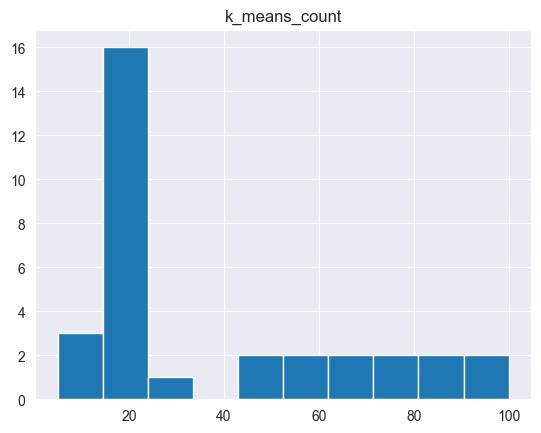

In [12]:
k_cluster.hist()

### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering (10 points)

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain
 - How the two results are different
 - Why there is such a difference

Answer: The reason why there is so much difference is in how kmeans and agglomeritive clustering work. Agg works bitwise, trying to merge clusters into a group based on smallest difference, with a hard threshold. KMenas instead tries merge clusters or vectors together, based on their variance. The idea is that... there are S groups big as n. Each S contains a set of observations. Find the minimum variance within the set, by changing out what observations you have in each S. Its an itterative process to assign clusters, wheres agglomeritive is kinda single pass to build clusters.

Since we are working with bits, and not continuous data, agglomeritive is probably the more appropriate, as it determines how many clusters there are, while Kmeans has to figure it out algorithmically.

In [13]:
k_cluster["agglo_cluster"]=agglo_cluster.values
k_cluster["abs_difference"]=abs(k_cluster.k_means_count-k_cluster.agglo_cluster)
averag_diff_models=sum(k_cluster["abs_difference"])/k_cluster.shape[0]

display("Average diff models {} Max diff {} Min diff {}".format(averag_diff_models,max(k_cluster["abs_difference"].values),min(k_cluster["abs_difference"].values)),k_cluster)

'Average diff models 48.75 Max diff 222.0 Min diff 0.0'

,k_means_count,agglo_cluster,abs_difference
0,85,193.0,108.0
1,19,100.0,81.0
2,43,187.0,144.0
3,20,99.0,79.0
4,17,3.0,14.0
5,48,194.0,146.0
6,100,100.0,0.0
7,74,296.0,222.0
8,88,3.0,85.0
9,12,1.0,11.0


## Exercise 3 - Principal Component Analysis (30 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 3.1 - Generate 2 Clusters (10 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

In [14]:
thing=KMeans(random_state=69420,n_clusters=2)
labels_kM=thing.fit_predict(df)
unique, k_means_count = np.unique(labels_kM, return_counts=True)
k_cluster=pd.DataFrame({"k_means_count": k_means_count})
display(k_cluster)

,k_means_count
0,784
1,416


### Exercise 3.2 - PCA for Feature Extraction (20 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

In [15]:
display(k_cluster)

,k_means_count
0,784
1,416


,0,1,Assigned_cluster
0,-0.645449,0.340130,0
1,-0.898524,0.457478,0
2,-0.485476,0.487493,0
3,-0.898524,0.457478,0
4,-1.149490,0.334194,0
...,...,...,...
1195,-0.217074,-0.542557,0
1196,-0.604962,-0.590873,0
1197,0.036001,-0.659906,0
1198,-0.127321,-0.535317,0


[ 0.32141672 -0.30601928 -0.10218736  0.02708557 -0.00047086 -0.25099608
 -0.4128318  -0.41366727  0.34532227  0.25306075 -0.11677425 -0.04703916
 -0.19347426 -0.01277596 -0.00660438  0.38799795] 
 highest pos 0.38799794629862827, feature b0


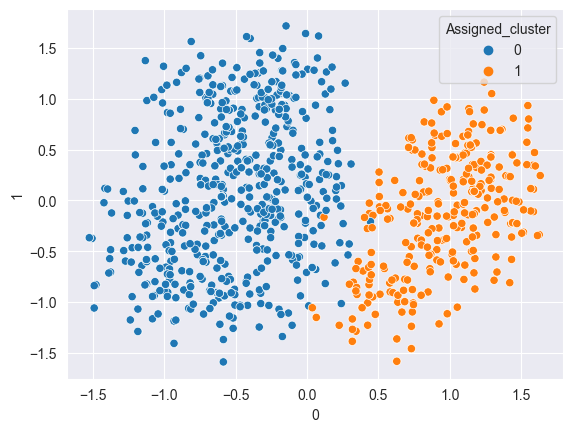

In [16]:
import seaborn as sb
from sklearn.decomposition import PCA
pca_hw=PCA(n_components=2)
projection=pd.DataFrame(pca_hw.fit_transform(df)) #each row corresponds to the observation.
projection["Assigned_cluster"]=labels_kM
display(projection)
sb.scatterplot(x=projection[0],y=projection[1],hue=projection["Assigned_cluster"])
print(pca_hw.components_[0],"\n highest pos {}, feature {}".format(max(pca_hw.components_[0]),df.columns[np.argmax(pca_hw.components_[0])]))

## Exercise 4 - Collaborative Statement (5 points) 
### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

In [17]:
#None, other than using discussion to better understand the PCA methods.